# Celltype QC PBMC

In [1]:
!date

Tue Aug 20 12:57:14 PDT 2024


In [2]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/scquint_4


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scanpy as sc
import anndata
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
input_dir = '/nowakowskilab/data1/derek/data_scSLR/PBMC/'

In [5]:
adata = sc.read_h5ad(input_dir+'gene_expression_v2.h5ad')

In [7]:
# fix color for 'Memory CD8 T cells'
adata.uns['celltype_colors'][6] = '#F8D90B'

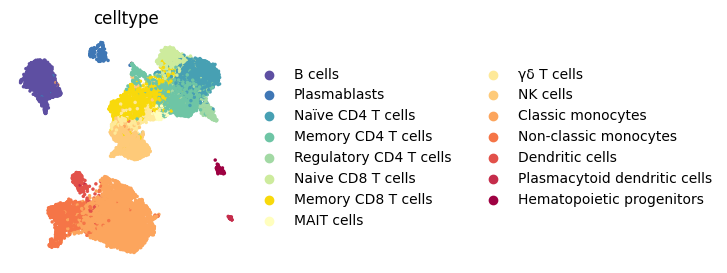

In [8]:
plt.rcParams['figure.figsize']=3,3

sc.pl.umap(adata,color=['celltype',
                       ],
           size=25,
           ncols=4,
            # palette='Spectral_r',
       #    legend_loc='on data',
           frameon=False,
          )

In [17]:
color_dict = dict(zip(adata.obs.celltype.cat.categories,adata.uns['celltype_colors']))

In [13]:
markers=[
'CD14', # 'Classic monocytes',
 'CD8A',# 'Memory CD4 T cells',
'GNLY', # 'NK cells',
 'CD4',# 'Memory CD8 T cells',
'CCR7', # 'Naïve CD4 T cells',
 'CD38',# 'Plasmablasts',
 'FCGR3A',# 'Non-classic monocytes',
 'TRDV2',# 'γδ T cells',
'FOXP3', # 'Regulatory CD4 T cells',
'MS4A1', # 'B cells',
 # 'Naive CD8 T cells',
 'TRAV1-2',# 'MAIT cells',
 'CD34',# 'Hematopoietic progenitors',
 'CD1C',# 'Dendritic cells',
 'CLEC4C'# 'Plasmacytoid dendritic cells'
        ]

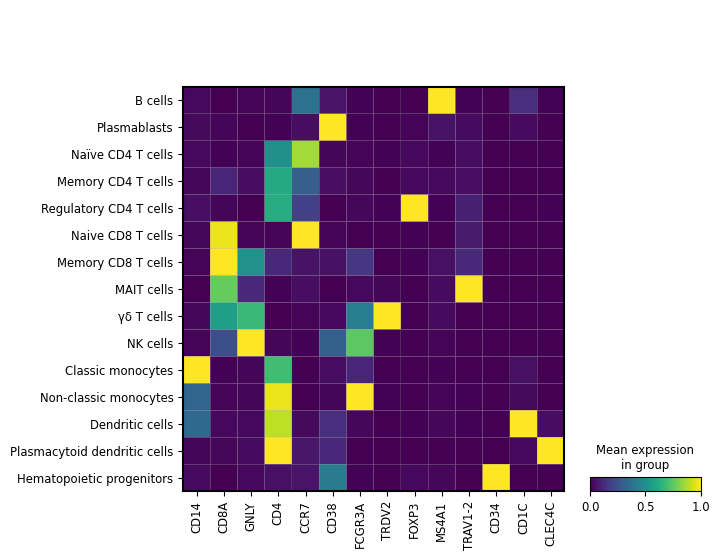

In [14]:
sc.pl.matrixplot(adata,
                 markers,
                 groupby='celltype',
                 standard_scale='var',
                )

In [42]:
celltype_reorder = [
'Naïve CD4 T cells',
'Memory CD4 T cells',
    'Regulatory CD4 T cells',
'Naive CD8 T cells',    
'Memory CD8 T cells',
        'NK cells',
    'γδ T cells',
    'MAIT cells',
    'B cells',
    'Plasmablasts',
    'Classic monocytes',
    'Non-classic monocytes',
    'Dendritic cells',
    'Plasmacytoid dendritic cells',
    'Hematopoietic progenitors'

]
 

In [43]:
color_reorder = list(map(color_dict.get, celltype_reorder))

In [44]:
marker_reorder = [
    'CD3E',
    'CD4',
        'FOXP3',
    'CCR7',
    'CD8A',
    'KLRC1',#
    'GNLY',
    'PRF1',#
    'TRGV9',#
    'TRDV2',
    'TRAV1-2',
    'CD79A',#
    'MS4A1',
    'CD27',#
    'CD38',
    'CD14',
    'LYZ',#
    'S100A9',#
    'CTSS',#
    'FCGR3A',
    'CDKN1C',#
    'LYN',#
    'ITGAX',#
    'FCER1A',#
    'CD1C',
    'PLD4',#
    'SERPINF1',#
    'LILRA4',#
    'CLEC4C',
    'CD34'
]

In [45]:
markers_complex = [
'CD3E',
'CD3D',
'CD3_p',#'CD3|CD3E',
'CD4',
'CD4_p',#'CD4|CD4',
'CD8A',
'CD8B',
'CD8_p',#'CD8|CD8A',
'SELL',
'SELL_p',# CD62L|SELL_p',
'PTPRC',
'CD45RA_p',#|PTPRC'
'CD45RO_p',#|PTPRC'
# 'CD197|CCR7'
'CCR7',
'CD28',
'FOXP3',
'CTLA4',
'TIGIT',
'CD69',
'CD69_p',#CD69|CD69',
'PKM',
'EIF1',
'CXCR5',
# 'CD185|CXCR5',
'IL4R',
'CDO1',
'PTGDR2',
'KRT1',
'ITGAE',
'ITGAE_p',#CD103|ITGAE',
'CXCR3',
# 'CD183|CXCR3',
'MME',
'MME_p',#CD10|MME',
'ZNF683',
'IKZF2',
'IKZF1',
'SOX4',
'TOX',
'FXYD2',
'NREP',
'CDCA7',
'TRGC2',
'CADM1',
'JAKMIP1',
'GZMA',
'GZMB',
'GZMH',
'GZMK',
'GZMM',
'GNLY',
'PRF1',
'POU3F1',
'TPRG1',
'EOMES',
'TRGC1',
'TRDV2',
'TRGV9',
'KLRC1',
'TRDC',
'CXCR6',
'CCR6',
'SLC4A10',
'PRSS35',
'ME1',
'KLRB1',
'DPP4',
'DPP4_p',#'CD26','DPP4',
'FCGR3A',
'CD16_p',#'CD16','FCGR3A',
'NCAM1',
'NCAM1_p',#'CD56','NCAM1',
'IL2RA',
'IL2RA_p',#'CD25'|'IL2RA',
'KIT',
'KIT_p',#'CD117|KIT',
'MAP3K8'
]

In [46]:
adata.obs.celltype.cat.reorder_categories(celltype_reorder, inplace=True)

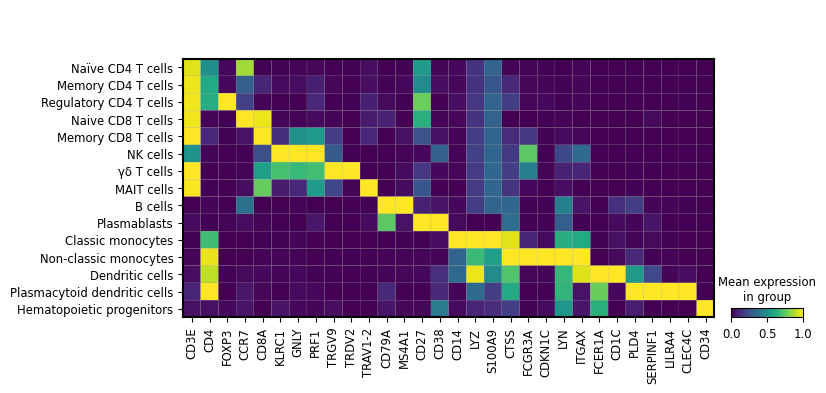

In [47]:
fig, ax = plt.subplots(1,1,figsize = (8,4))

sc.pl.matrixplot(adata,
                 marker_reorder,
                 groupby='celltype',
                 standard_scale='var',
                 # save='celltype_expression_PBMC.pdf',
                 ax=ax,
                )

In [48]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [49]:
mat = sc.get.obs_df(adata,
            keys=["celltype", *marker_reorder],
             )

In [50]:
standardized = mat.groupby('celltype').mean()

subtract = standardized.min()

standardized = (standardized - subtract) / (
            standardized.max() - standardized.min())

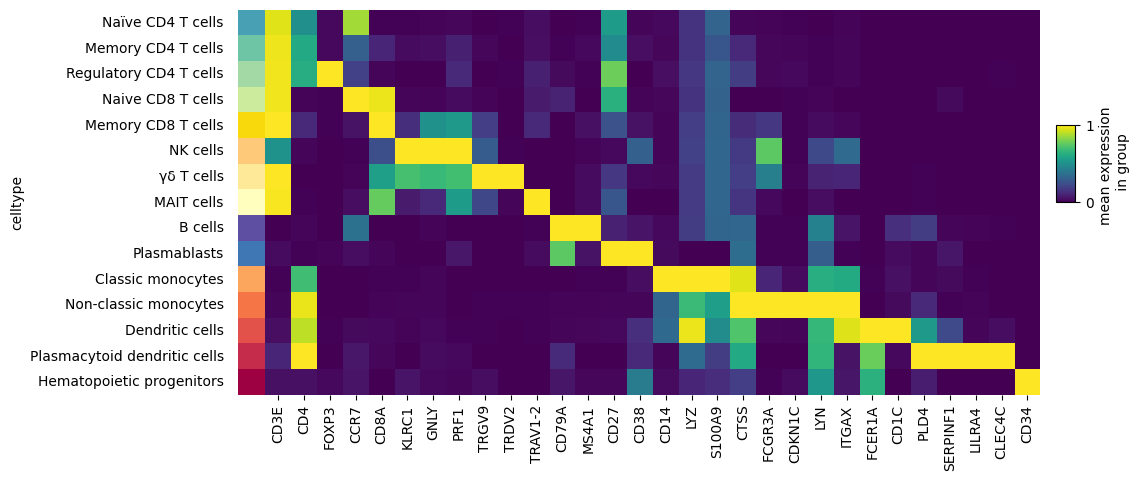

In [52]:
fig, ax = plt.subplots(1,1, figsize = (10,5))

group_names = adata.obs.celltype.cat.categories
data = standardized
data['celltype'] = adata.obs.celltype.cat.categories


n = sns.heatmap(data.drop(['celltype'], axis=1),
                cmap ='viridis' ,
                cbar=False,
                # linewidths=.05,
            ax=ax )




ax.tick_params(axis='y', which='major', pad=30, length=0, ) # extra padding to leave room for the row colors



# ax.set_yticklabels(data['C_scANVI_simple'], rotation=0) # optionally use the groups as the tick labels
for i, color in enumerate(color_reorder):
    ax.add_patch(plt.Rectangle(xy=(-0.035, i), width=0.035, height=1, color=color, lw=0,
                               transform=ax.get_yaxis_transform(), clip_on=False))

    
# cbar_kws = dict(orientation='horizontal', location='bottom', label='Scale', pad=0.1, shrink=0.5, ticks=[0, 25, 50])
    


axins = inset_axes(ax, width = "2.5%", height = "20%", loc = 'lower left',
                   bbox_to_anchor = (1.02, 0.5, 1, 1), bbox_transform = ax.transAxes,
                   borderpad = 0)

fig.colorbar(ax.collections[0], cax = axins, orientation = 'vertical', label='mean expression \n in group',  ticks=[0, 1.0])

fig.savefig('./plots/celltype_expression_heatmap.pdf')

In [18]:
groups_test = [i for i in adata.obs.ct3.unique() if (i.startswith('T4') | i.startswith('T8'))]

groups_test = [i for i in groups_test if 'Pool' not in i]

In [19]:
[i for i in adata.var_names if i.startswith('GZM')]

['GZMK', 'GZMA', 'GZMH', 'GZMB', 'GZMM']

In [20]:
marker_TCELL = [
    'CCR7',
    'PDCD1',
    'TIGIT',
    'LEF1',
    'TCF7',
    'GZMH',
    'GZMK',
    'TRAV1-2'




]

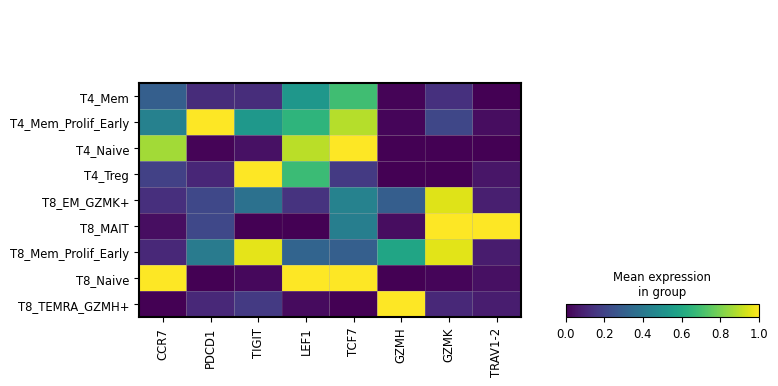

In [21]:
fig, ax = plt.subplots(1,1,figsize = (8,4))

sc.pl.matrixplot(adata[adata.obs.ct3.isin(groups_test)],
                 marker_TCELL,
                 groupby='ct3',
                 standard_scale='var',
              #   save='celltype_expression_PBMC.pdf',
                 ax=ax,
                )

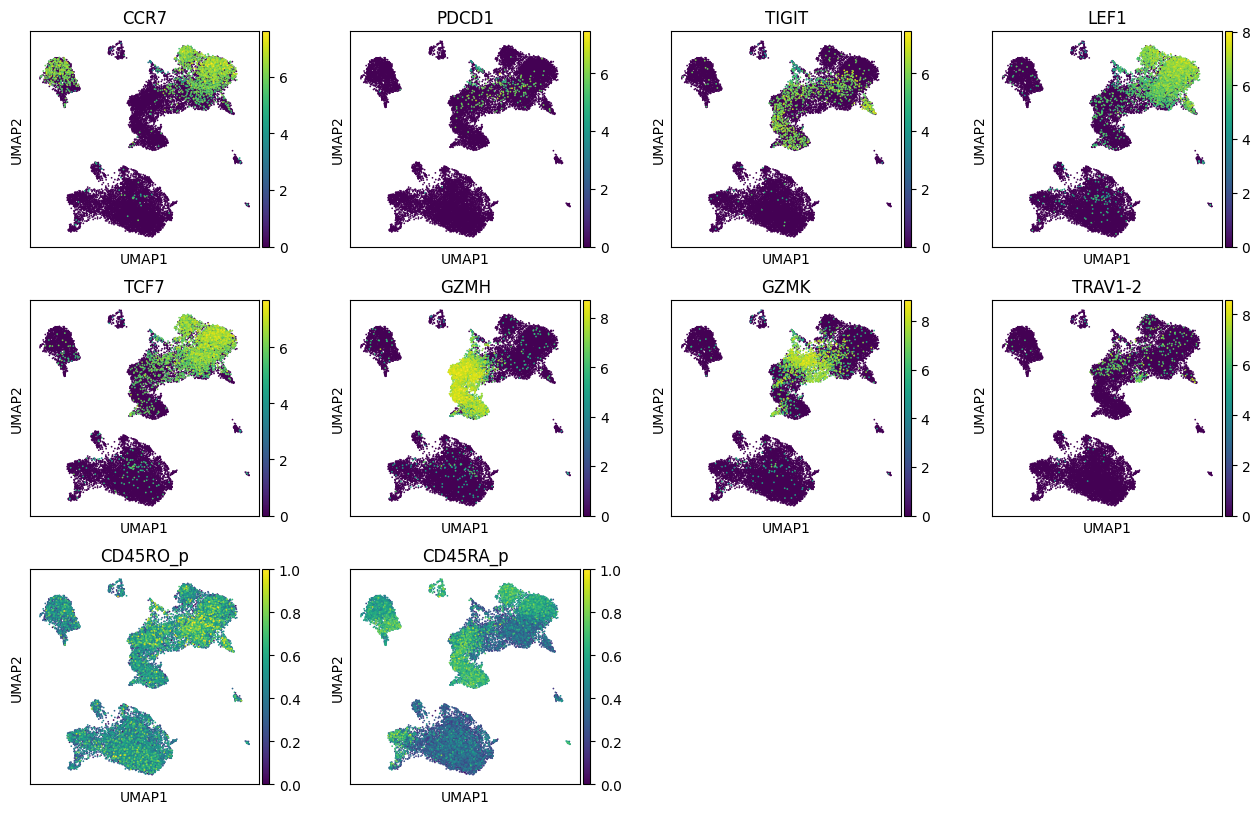

In [22]:
sc.pl.umap(adata,
           color=marker_TCELL + ['CD45RO_p','CD45RA_p']
          )
           

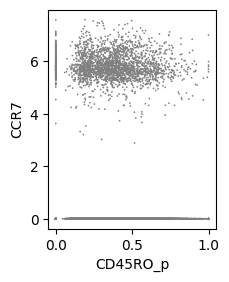

In [83]:
sc.pl.scatter(adata,
             x='CD45RO_p',
             y='CCR7')

In [84]:
!conda list

# packages in environment at /c4/home/derek/miniconda3/envs/scquint_4:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
_r-mutex                  1.0.1               anacondar_1    conda-forge
_sysroot_linux-64_curr_repodata_hack 3                   h69a702a_16    conda-forge
aiofiles                  22.1.0             pyhd8ed1ab_0    conda-forge
aiosqlite                 0.18.0             pyhd8ed1ab_0    conda-forge
anndata                   0.8.0                    pypi_0    pypi
anyio                     3.6.2              pyhd8ed1ab_0    conda-forge
appdirs                   1.4.4                    pypi_0    pypi
archspec                  0.2.3              pyhd8ed1ab_0    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0          py310h5764c6d_3   